In [38]:
import pandas as pd
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import json 
import numpy as np
import os
cwd = os.getcwd()


# In[41]:


# The aim of this project is to explore the number and geographic distribution of Ukrainian refugees in Ireland since 2022. 
# I intend to map this to housing data and the Pobal Deprivation Index to explore the relationship between:
# 1. The number of Ukrainian refugees in a given area;
# 2. The current housing stock in that area.
# 3. From this analysis, I intend to plot the increase in the number of refugees in a given area over time in relation to the housing stock in that area and see what insights can be extracted

# First I will import a CSO dataset on the number of Ukrainian refugees who have arrived in each Local Electoral Area in Ireland in 2022 in XLSX format:
ukraine_arrivals_county_xlsx  = pd.read_excel(r"C:\Users\andyb\OneDrive\Documents\Ukraine Arrivals 2022.xlsx", sheet_name = "No. of arrivals")
ua_df1 = pd.DataFrame(ukraine_arrivals_county_xlsx)
ua_df1.head()

# Note that the data in this table is cumulative; the figure in each LEA for each successive month includes the previous figures from previous months.


# In[42]:


# I will filter by December 12th to get the latest figure for each LEA
mask1 = ua_df1["Day"].str.contains("2022 December 12")
ua_df1[mask1].head()


# In[43]:


# Next, I will import another sheet from the same XLSX file with the number of Ukrainian refugees in each LEA as a percentage of the population:
ukraine_arrivals_percentage_of_pop_xlsx  = pd.read_excel(r"C:\Users\andyb\OneDrive\Documents\Ukraine Arrivals 2022.xlsx", sheet_name = "Arrivals as % of Pop")
ua_df2 = pd.DataFrame(ukraine_arrivals_percentage_of_pop_xlsx)


# In[44]:


# I will filter by December 12th to get the latest figure for each LEA
mask2 = ua_df2["Day"].str.contains("2022 December 12")
ua_df2[mask2].head()


# In[45]:


# I will now merge these tables 
ua_arrivals_overview = pd.merge(ua_df1, ua_df2)
ua_arrivals_overview.dropna()
ua_arrivals_overview.loc[(ua_arrivals_overview["County"] == "Kerry") & (ua_arrivals_overview["Day"] == "2022 December 12")]


# In[46]:


mask3 = ua_arrivals_overview["Day"].str.contains("2022 December 12")
ua_arrivals_overview[mask3].loc[:]


# In[18]:


grouped_counties = ua_arrivals_overview[mask3].groupby(["Day", "County"]).sum("No. of people")
ua_arrivals_overview_grouped = pd.DataFrame(grouped_counties)
ua_arrivals_overview_grouped.loc[:]

No. of people  Percentage (%) of Population
Day              County                                                 
2022 December 12  Roscommon          707.0                      2.908529
                 Carlow              872.0                      3.675898
                 Cavan              1258.0                      4.612670
                 Clare              4008.0                     17.423908
                 Cork               6135.0                     16.091175
                 Donegal            4789.0                     20.771018
                 Dublin            11349.0                     23.515696
                 Galway             4025.0                     15.485376
                 Kerry              4743.0                     16.477453
                 Kildare            1063.0                      3.421099
                 Kilkenny           1255.0                      4.460391
                 Laois               789.0                      2.540995
                 Leitrim            1259.0                     10.962371
                 Limerick           2301.0                      6.532603
                 Longford            429.0                      2.770796
                 Louth              1640.0                      5.752680
                 Mayo               3169.0                     13.903679
                 Meath              1549.0                      4.319264
                 Monaghan            418.0                      1.979288
                 Offaly              619.0                      2.112969
                 Sligo              1178.0                      5.360884
                 Tipperary          1185.0                      5.293521
                 Waterford          1654.0                      7.283860
                 Westmeath          1464.0                      5.983177
                 Wexford            2329.0                      8.611555
                 Wicklow            1945.0                      8.463746

In [39]:
# The Kenmare entry for Kerry appears to be missing, so that will need to be appended. A bigger problem is that the percentages have been summed, giving incorrect figures. 
# The percentage figures are for each LEA rather than the county as a whole and so cannot be summed.
#I will correct this now by dropping the percentage column from this DataFrame:
ua_arrivals_overview_people_only = ua_arrivals_overview_grouped.drop(columns = "Percentage (%) of Population")
ua_arrivals_overview_people_only.loc[:]

No. of people
Day              County                   
2022 December 12  Roscommon          707.0
                 Carlow              872.0
                 Cavan              1258.0
                 Clare              4008.0
                 Cork               6135.0
                 Donegal            4789.0
                 Dublin            11349.0
                 Galway             4025.0
                 Kerry              4743.0
                 Kildare            1063.0
                 Kilkenny           1255.0
                 Laois               789.0
                 Leitrim            1259.0
                 Limerick           2301.0
                 Longford            429.0
                 Louth              1640.0
                 Mayo               3169.0
                 Meath              1549.0
                 Monaghan            418.0
                 Offaly              619.0
                 Sligo              1178.0
                 Tipperary          1185.0
                 Waterford          1654.0
                 Westmeath          1464.0
                 Wexford            2329.0
                 Wicklow            1945.0

In [40]:
# Now to append the value for Kerry by replacing 4743 with 6493 (4743 + 1750 which is the missing total no. of arrivals in Kenmare):
ua_arrivals_overview_people_appended = ua_arrivals_overview_people_only.replace(to_replace = 4743, value = 6493)
ua_arrivals_overview_people_appended.loc[:]

No. of people
Day              County                   
2022 December 12  Roscommon          707.0
                 Carlow              872.0
                 Cavan              1258.0
                 Clare              4008.0
                 Cork               6135.0
                 Donegal            4789.0
                 Dublin            11349.0
                 Galway             4025.0
                 Kerry              6493.0
                 Kildare            1063.0
                 Kilkenny           1255.0
                 Laois               789.0
                 Leitrim            1259.0
                 Limerick           2301.0
                 Longford            429.0
                 Louth              1640.0
                 Mayo               3169.0
                 Meath              1549.0
                 Monaghan            418.0
                 Offaly              619.0
                 Sligo              1178.0
                 Tipperary          1185.0
                 Waterford          1654.0
                 Westmeath          1464.0
                 Wexford            2329.0
                 Wicklow            1945.0

<AxesSubplot:xlabel='No. of people', ylabel='County'>

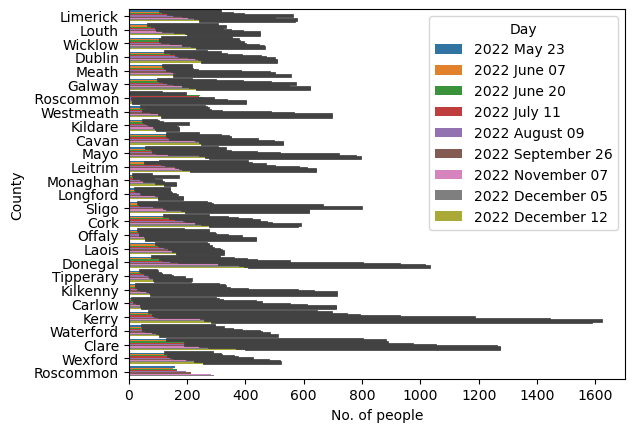

In [43]:
# Time for a chart to begin visualising the data:
sns.barplot(x = "No. of people", y= "County", hue = "Day", data = ua_arrivals_overview)